# kaggle house

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

In [66]:
df = pd.read_csv("train.csv")

In [67]:
df.shape

(1460, 81)

In [68]:
def get_age(num):
    return 2017-num

In [69]:
df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [70]:
def get_age(x):
    res = x['YrSold'] - x['YearBuilt']
    return res

In [71]:
def get_year_after_remod(x):
    res = x['YrSold'] - x['YearRemodAdd']
    return res

In [74]:
def change_month(mon):
    return str(mon)

In [76]:
df['Age'] = df.apply(get_age, axis = 1)
df['Year_after_remod'] = df.apply(get_year_after_remod, axis = 1)
df['MoSold'] = df['MoSold'].apply(change_month)
df.drop(['YrSold','YearBuilt','YearRemodAdd', 'MoSold'], axis =1, inplace = True)

In [78]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Year_after_remod
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945,22.950000
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152,20.640653
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000,4.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000,14.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000,41.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,136.000000,60.000000


In [79]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Year_after_remod
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.050298,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917,0.012724,0.022049
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.022936,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.084284,-0.028746,-0.041968
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799,-0.122848,-0.088417
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014832,-0.014709
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.572629,-0.552570
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856,0.377325,-0.070931
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,-0.072319,0.114442,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493,-0.315562,-0.180183
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.248483,-0.127556
BsmtFinSF2,-0.005968,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.072319,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.050422,0.069814
BsmtUnfSF,-0.007940,-0.140759,0.132644,-0.002618,0.308159,-0.136841,0.114442,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.150619,-0.183830


In [80]:
(df.corr()).shape

(36, 36)

In [81]:
cat_col = list(df.corr().columns)

In [82]:
cat_col.pop(0)

'Id'

In [83]:
len(cat_col)

35

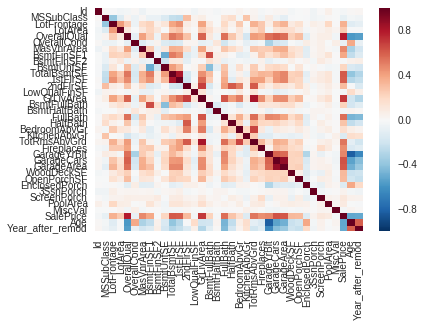

In [84]:
import seaborn as sns; 
ax = sns.heatmap(df.corr())

In [85]:
set(list(df.columns)) - set(cat_col)

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [86]:
real_cat = list(set(list(df.columns)) - set(cat_col))

In [87]:
real_cat.remove("Id")

In [88]:
df[real_cat][:10]

,MasVnrType,LotConfig,GarageQual,Exterior1st,GarageFinish,Electrical,BsmtQual,BsmtExposure,Foundation,GarageType,...,Fence,SaleCondition,ExterCond,ExterQual,Functional,Alley,Street,HouseStyle,MiscFeature,PoolQC
0,BrkFace,Inside,TA,VinylSd,RFn,SBrkr,Gd,No,PConc,Attchd,...,NaN,Normal,TA,Gd,Typ,NaN,Pave,2Story,NaN,NaN
1,None,FR2,TA,MetalSd,RFn,SBrkr,Gd,Gd,CBlock,Attchd,...,NaN,Normal,TA,TA,Typ,NaN,Pave,1Story,NaN,NaN
2,BrkFace,Inside,TA,VinylSd,RFn,SBrkr,Gd,Mn,PConc,Attchd,...,NaN,Normal,TA,Gd,Typ,NaN,Pave,2Story,NaN,NaN
3,None,Corner,TA,Wd Sdng,Unf,SBrkr,TA,No,BrkTil,Detchd,...,NaN,Abnorml,TA,TA,Typ,NaN,Pave,2Story,NaN,NaN
4,BrkFace,FR2,TA,VinylSd,RFn,SBrkr,Gd,Av,PConc,Attchd,...,NaN,Normal,TA,Gd,Typ,NaN,Pave,2Story,NaN,NaN
5,None,Inside,TA,VinylSd,Unf,SBrkr,Gd,No,Wood,Attchd,...,MnPrv,Normal,TA,TA,Typ,NaN,Pave,1.5Fin,Shed,NaN
6,Stone,Inside,TA,VinylSd,RFn,SBrkr,Ex,Av,PConc,Attchd,...,NaN,Normal,TA,Gd,Typ,NaN,Pave,1Story,NaN,NaN
7,Stone,Corner,TA,HdBoard,RFn,SBrkr,Gd,Mn,CBlock,Attchd,...,NaN,Normal,TA,TA,Typ,NaN,Pave,2Story,Shed,NaN
8,None,Inside,Fa,BrkFace,Unf,FuseF,TA,No,BrkTil,Detchd,...,NaN,Abnorml,TA,TA,Min1,NaN,Pave,1.5Fin,NaN,NaN
9,None,Corner,Gd,MetalSd,RFn,SBrkr,TA,No,BrkTil,Attchd,...,NaN,Normal,TA,TA,Typ,NaN,Pave,1.5Unf,NaN,NaN


(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

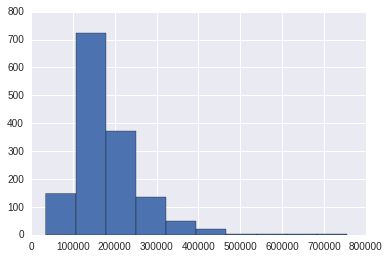

In [89]:
plt.hist(df.SalePrice)

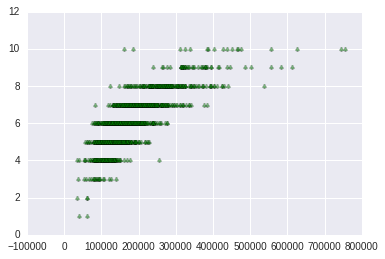

In [90]:
plt.scatter(df.SalePrice, df.OverallQual, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")

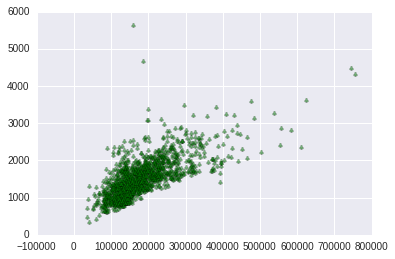

In [91]:
plt.scatter(df.SalePrice, df.GrLivArea, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")

In [92]:
df.shape

(1460, 79)

In [93]:
df = df[df.GrLivArea <4500]

In [94]:
df.shape

(1458, 79)

In [95]:
from sklearn.preprocessing import MinMaxScaler
df.fillna(0, inplace = True)
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
df[cat_col] = scaler.fit_transform(df[cat_col])

In [96]:
df.drop('Id',axis =1, inplace = True)

In [97]:
y = df.SalePrice

In [98]:
df.drop('SalePrice', axis =1, inplace = True)

In [99]:
X= pd.get_dummies(df)

In [100]:
for x in made_up2:
    X[x] = 0

In [101]:
X.shape

(1458, 313)

In [102]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)
# Show the results of the split
print X_train.shape
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

(1166, 313)
Training set has 1166 samples.
Testing set has 292 samples.


In [103]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)    
    
    # Return the score
    return score

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True, 
                              needs_proba=False, needs_threshold=False)
    

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 
    #'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.   
 
    grid= GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)        

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [105]:
X.shape

(1458, 313)

In [106]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 10 for the optimal model.


In [113]:
score = performance_metric(y_test, reg.predict(X_test))
print score

0.739300990693


In [108]:
y

0       0.241078
1       0.203583
2       0.261908
3       0.145952
4       0.298709
5       0.150118
6       0.377864
7       0.229274
8       0.131926
9       0.115401
10      0.131371
11      0.430635
12      0.151507
13      0.339675
14      0.169560
15      0.134842
16      0.158450
17      0.076517
18      0.172337
19      0.144563
20      0.403277
21      0.145119
22      0.270935
23      0.131926
24      0.165394
25      0.307457
26      0.138731
27      0.376475
28      0.239689
29      0.046660
          ...   
1430    0.218359
1431    0.151160
1432    0.041105
1433    0.210526
1434    0.173726
1435    0.193168
1436    0.118872
1437    0.499538
1438    0.159422
1439    0.225108
1440    0.216775
1441    0.158867
1442    0.382030
1443    0.119567
1444    0.200944
1445    0.130676
1446    0.170810
1447    0.284822
1448    0.107068
1449    0.079295
1450    0.140397
1451    0.350215
1452    0.152895
1453    0.068879
1454    0.208443
1455    0.194556
1456    0.243161
1457    0.3216

# gradient boosting

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor = GradientBoostingRegressor()

        
    params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              'max_features': [1.0, 0.3, 0.1] 
              }   
    

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True, 
                              needs_proba=False, needs_threshold=False)  
 
 
    grid= GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)        

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [126]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])
   

Parameter 'max_depth' is 6 for the optimal model.


In [133]:
reg

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=0.1,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=20, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [132]:
score = performance_metric(y_test, reg.predict(X_test))
print score

0.913921579162


#test

In [138]:
df_test = pd.read_csv("test.csv")

In [139]:
df_test.shape

(1459, 80)

In [140]:
df_test['Age'] = df_test.apply(get_age, axis = 1)
df_test['Year_after_remod'] = df_test.apply(get_year_after_remod, axis = 1)
df_test['MoSold'] = df_test['MoSold'].apply(change_month)
df_test.drop(['YrSold','YearBuilt','YearRemodAdd', 'MoSold'], axis =1, inplace = True)

In [141]:
df_test.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age,Year_after_remod
Id,1.000000,0.004993,0.009930,0.051492,-0.064887,0.009553,-0.021424,-0.045966,0.015862,0.001203,...,-0.050941,0.015664,-0.002045,0.020999,-0.025896,0.025566,0.049535,-0.005744,0.016865,0.019378
MSSubClass,0.004993,1.000000,-0.450505,-0.359537,0.034690,-0.071768,-0.012186,-0.058775,-0.079093,-0.111080,...,-0.108000,-0.022539,-0.025421,-0.029051,-0.029709,-0.071978,-0.017790,-0.045835,-0.041150,-0.046833
LotFrontage,0.009930,-0.450505,1.000000,0.644608,0.182870,-0.092312,0.251533,0.204621,0.046824,0.092031,...,0.375581,0.157426,0.179795,0.013340,-0.037487,0.113444,0.134232,0.068161,-0.123279,-0.094140
LotArea,0.051492,-0.359537,0.644608,1.000000,0.107989,-0.103402,0.188691,0.185470,0.054199,0.071681,...,0.315841,0.158483,0.164815,0.099850,-0.001846,0.088712,0.140494,0.139071,-0.050434,-0.040055
OverallQual,-0.064887,0.034690,0.182870,0.107989,1.000000,-0.095874,0.453991,0.322583,-0.028199,0.243070,...,0.568161,0.270790,0.288367,-0.161339,0.002803,0.022334,-0.012330,0.033784,-0.621574,-0.591984
OverallCond,0.009553,-0.071768,-0.092312,-0.103402,-0.095874,1.000000,-0.144261,-0.054720,0.043109,-0.139927,...,-0.156769,0.043058,-0.103783,0.072178,0.071285,0.033146,-0.037191,0.007236,0.361196,-0.020702
MasVnrArea,-0.021424,-0.012186,0.251533,0.188691,0.453991,-0.144261,1.000000,0.343267,0.037546,0.064672,...,0.375182,0.172721,0.163666,-0.112814,0.005772,0.069339,-0.005395,0.105723,-0.313281,-0.215792
BsmtFinSF1,-0.045966,-0.058775,0.204621,0.185470,0.322583,-0.054720,0.343267,1.000000,-0.059522,-0.459581,...,0.323800,0.242369,0.136321,-0.097441,0.088241,0.131414,0.012089,0.165403,-0.307850,-0.173312
BsmtFinSF2,0.015862,-0.079093,0.046824,0.054199,-0.028199,0.043109,0.037546,-0.059522,1.000000,-0.265183,...,0.022391,0.126032,-0.014185,0.029010,-0.014473,0.039806,0.050152,-0.012808,0.007660,0.055592
BsmtUnfSF,0.001203,-0.111080,0.092031,0.071681,0.243070,-0.139927,0.064672,-0.459581,-0.265183,1.000000,...,0.145625,-0.073174,0.111249,0.012468,-0.046230,-0.085111,-0.029672,0.000320,-0.113244,-0.150936


In [142]:
cat_col = list(df_test.corr().columns)

In [143]:
id_col = df_test.Id
cat_col.pop(0)

'Id'

In [144]:
df_test.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'ExterQual',
       u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir',
       u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd',
       u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageType',
       u'GarageYrBlt', u'GarageFinish', u'GarageCars', u'GarageArea',
       

In [145]:
df_test['SalePrice'] = 0

In [146]:
df_test.drop('Id', axis = 1, inplace = True)

In [147]:
df_test.fillna(0, inplace = True)
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
df_test[cat_col] = scaler.fit_transform(df_test[cat_col])

In [148]:
df_test_dum= pd.get_dummies(df_test)

In [149]:
made_up1 = list(set(list(X.columns)) - set(list(df_test_dum.columns)))

In [150]:
made_up2 = list(set(list(df_test_dum.columns)) - set(list(X.columns)))

In [151]:
print len(list(X.columns))
print len(list(df_test_dum.columns))
print len(made_up1)
print len(made_up2)

313
291
22
0


In [152]:
for x in made_up1:
    df_test_dum[x] = 0

In [153]:
df_test_dum.shape

(1459, 313)

In [60]:
example_df = pd.read_csv("sample_submission.csv")
example_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [154]:
pred = reg.predict(df_test_dum)

In [155]:
result_df = pd.DataFrame({"SalePrice":pred*1000000}, index = id_col)

In [156]:

result_df.to_csv("result1.csv")

In [157]:
result_df.head(100)

,SalePrice
Id,
1461,117799.891780
1462,146664.061884
1463,198947.027098
1464,201829.166242
1465,196023.303473
1466,189835.101110
1467,152983.510470
1468,176601.156044
1469,212756.071679
